In [8]:
# coding=utf-8
import csv
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense, Embedding,LSTM
import pandas as pd
import jieba 
import logging
from hanziconv import HanziConv
from gensim.models import Word2Vec  
from gensim.models.word2vec import LineSentence
import matplotlib.pyplot as plt
%matplotlib inline
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [9]:
#add dictionary
jieba.add_word('不')
jieba.add_word('喜歡')
jieba.add_word('現在')
jieba.add_word('在乎')
jieba.add_word('瘋瞭')
jieba.add_word('永遠')
jieba.add_word('無法')
jieba.add_word('這堂課')
jieba.add_word('會')
jieba.add_word('齣糗')
jieba.add_word('退迴來')
jieba.add_word('覺得')
jieba.add_word('閤作')
jieba.add_word('應該')
jieba.add_word('這件事')
jieba.add_word('外麵')
jieba.add_word('麵對')
jieba.add_word('太')
jieba.add_word('對勁')
jieba.add_word('控製')
jieba.add_word('麵前')
jieba.add_word('禮拜')
jieba.add_word('睏擾')
jieba.add_word('我')
jieba.add_word('想')
jieba.add_word('總是')
jieba.add_word('都會')
jieba.add_word('大傢')
jieba.add_word('過得')
jieba.add_word('大傢')
jieba.add_word('背後')
jieba.add_word('纔會')
jieba.add_word('沒有')
jieba.add_word('猜到')
jieba.add_word('毀瞭')
jieba.add_word('受傷')
jieba.add_word('絕對')
jieba.add_word('長得')
jieba.add_word('處的來')
jieba.add_word('也許')
jieba.add_word('每')
jieba.add_word('愛')

In [10]:
filePath1='train_test.txt'
fileSegWordDonePath1 ='corpusSegDone1.txt'
filePath2='test.txt'
fileSegWordDonePath2 ='corpusSegDone2.txt'
filePath='trainandtest.txt'
fileSegWordDonePath ='corpusSegDone.txt'

#1 斷所有句子的詞(包含訓練和測試)
# read the file by file
fileTrainRead = []
with open(filePath) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][:],cut_all=False)))])
    with open(fileSegWordDonePath,'wb') as fW:
        for j in range(len(fileTrainSeg)):
            fW.write(fileTrainSeg[j][0].encode('utf-8'))
            
#2 斷詞(訓練data)
# read the file by file
fileTrainRead = []
with open(filePath1) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][:],cut_all=False)))])
    with open(fileSegWordDonePath1,'wb') as fW:
        for j in range(len(fileTrainSeg)):
            fW.write(fileTrainSeg[j][0].encode('utf-8'))
            
#3 斷詞(測試data)
# read the file by file
fileTrainRead = []
with open(filePath2) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][:],cut_all=False)))])
    with open(fileSegWordDonePath2,'wb') as fW:
        for j in range(len(fileTrainSeg)):
            fW.write(fileTrainSeg[j][0].encode('utf-8'))


In [11]:
#word2vec建立字典
inp1 = 'corpusSegDone.txt'
fileSegWordDonePath1 ='corpusSegDone1.txt'
fileSegWordDonePath2 ='corpusSegDone2.txt'
kmodel = Word2Vec(LineSentence(inp1), size=2 , min_count=1)
print(kmodel)
word2idx = {"_PAD": 0} # 初始化 `[word : token]` 字典，后期 tokenize 语料库就是用该词典。
vocab_list = [(k, kmodel.wv[k]) for k, v in kmodel.wv.vocab.items()]
#存储所有 word2vec 中所有向量的数组，留意其中多一位，词向量全为 0， 用于 padding
embeddings_matrix = np.zeros((len(kmodel.wv.vocab.items()) + 1, kmodel.vector_size))
for i in range(len(vocab_list)):
    word = vocab_list[i][0]
    word2idx[word] = i + 1
    embeddings_matrix[i + 1] = vocab_list[i][1]
print(embeddings_matrix[0])
print(embeddings_matrix[1][0])

#y_train讀入訓練的label值(也就是訓練句的每一句答案)
#y_test讀入測試的label值(也就是測試句的每一句答案)
df = pd.read_csv('output.csv',header=None)
y_train = df.as_matrix()
df = pd.read_csv('output_test.csv',header=None)
y_test = df.as_matrix()

Word2Vec(vocab=302, size=2, alpha=0.025)
[0. 0.]
0.033979736268520355


c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [12]:
#print(embeddings_matrix[1])

print(kmodel[u'他'])
print(kmodel[u'一定'])
print(kmodel[u'不'])
print(kmodel[u'信任'])
print(kmodel[u'我'])

[ 0.1749924  -0.02243673]
[-0.19767359 -0.06125917]
[0.19733228 0.1937251 ]
[0.00930853 0.15067114]
[ 0.20310217 -0.18271568]


c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__(

In [13]:
#資料預處理
data_array = []
with open(fileSegWordDonePath1,'rb') as fs:
    row = fs.read().decode('utf-8').split(' ')
    temp = []
    count = 0
#將斷詞對應字典編號
    for i in range(len(row)):
        if '\n' not in row[i]:
            for j in range(len(embeddings_matrix)):
                if embeddings_matrix[j][0] == kmodel[row[i]][0]:
                    temp.append(j)
            count += 1
#統一格式、將不一樣長的都補0
        else:
            if count<15:
                num = 15 - count
                for j in range(num):
                    zero = 0
                    temp.append(zero)
            temp[0] = np.squeeze(temp[0])
            data_array.append(temp)
            word = row[i].split()
            temp = []
            for j in range(len(embeddings_matrix)):
                if embeddings_matrix[j][0] == kmodel[word][0][0]:
                    temp.append(j)
            count = 1
    if count<15:
        num = 15 - count
        for j in range(num):
            zero = 0
            temp.append(zero)
    data_array.append(temp)
data_array = np.array(data_array).reshape((153, 15))
data_array[152][0] = np.squeeze(data_array[152][0])
X_train=data_array[:,:]
print (X_train)

data_array = []
with open(fileSegWordDonePath2,'rb') as fs:
    row = fs.read().decode('utf-8').split(' ')
    temp = []
    count = 0
    for i in range(len(row)):
        if '\n' not in row[i]:
            for j in range(len(embeddings_matrix)):
                if embeddings_matrix[j][0] == kmodel[row[i]][0]:
                    temp.append(j)
            count += 1
        else:
            if count<15:
                num = 15 - count
                for j in range(num):
                    zero = 0
                    temp.append(zero)
            temp[0] = np.squeeze(temp[0])
            data_array.append(temp)
            word = row[i].split()
            temp = []
            for j in range(len(embeddings_matrix)):
                if embeddings_matrix[j][0] == kmodel[word][0][0]:
                    temp.append(j)
            count = 1
    if count<15:
        num = 15 - count
        for j in range(num):
            zero = 0
            temp.append(zero)
    data_array.append(temp)

data_array = np.array(data_array).reshape((28, 15))
data_array[27][0] = np.squeeze(data_array[27][0])
X_test=data_array[:,:]


c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[[289  47 157 ...   0   0   0]
 [168  19 122 ...   0   0   0]
 [168   7  47 ...   0   0   0]
 ...
 [133 136 299 ...   0   0   0]
 [168 105   4 ...   0   0   0]
 [133 141 229 ...   0   0   0]]


c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Epoch 1/1
153/153 [==============================] - 1s 4ms/step - loss: 1.7914 - acc: 0.1830
iteration: 25 loss: 1.7642996389102312  accuracy: 0.3529411797819574
test accuracy: 0.32142857142857145
iteration: 50 loss: 1.6599442740670995  accuracy: 0.3660130717006384
test accuracy: 0.35714285714285715
iteration: 75 loss: 1.5041247621860379  accuracy: 0.40522876109173095
test accuracy: 0.35714285714285715
iteration: 100 loss: 1.3844417403726017  accuracy: 0.40522876109173095
test accuracy: 0.32142857142857145
iteration: 125 loss: 1.2898730507083969  accuracy: 0.4444444450288037
test accuracy: 0.32142857142857145
iteration: 150 loss: 1.1993373570099375  accuracy: 0.4771241789160211
test accuracy: 0.32142857142857145
iteration: 175 loss: 1.107322672613306  accuracy: 0.5294117656798144
test accuracy: 0.32142857142857145
iteration: 200 loss: 1.0148053956187628  accuracy: 0.5947712387134826
test accuracy: 0.32142857142857145
iteration: 225 loss: 0.9218888867135141  accuracy: 0.647058811842226

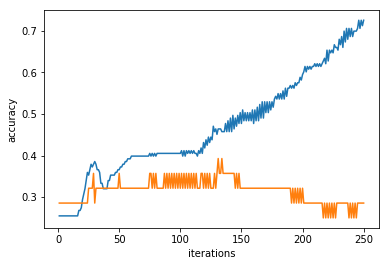

In [14]:
#build model
model = Sequential()

model.add(Embedding(len(embeddings_matrix),output_dim = 2,weights=[embeddings_matrix],mask_zero=True))
model.add(LSTM(batch_input_shape=(None,10),units=36,dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(units=6, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, np.array(y_train) ,batch_size=None, shuffle=True, verbose=1)
#categorical_crossentropy
#優化器:sgd adagrad rmsprop adadelta adam adamax nadam tfoptimizer


loss_array = []
accuracy_array = []
accuracy_test = []

#訓練幾個iteration以及列印結果
for step in range(1, 251):
    loss = model.train_on_batch(np.array(X_train), y_train)
    loss, accuracy = model.evaluate(X_train, y_train, batch_size=y_test.shape[0], verbose=False)
    X = X_test
    predictions = model.predict_classes(X)
    loss_array.append(loss)
    accuracy_array.append(accuracy)
    if step%25==0:
        print("iteration:",step,"loss: {}  accuracy: {}".format(loss,accuracy))
    accuracy = 0
#算準確率、測試檔中28個對幾個
    for i in range(28):
        for j in range(6):
            if y_test[i][j] == 1:
                ans = j
                if ans == predictions[i]:
                    accuracy += 1
    if step%25==0:
        print("test accuracy:",accuracy/28)
    accuracy_test.append(accuracy/28)
    
#get prediction result 
X = X_test
predictions = model.predict_classes(X) 
accuracy = 0

plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.plot([x+1 for x in range(250)],accuracy_array)
plt.plot([x+1 for x in range(250)],accuracy_test)

